In [5]:
!pip install japanize-matplotlib -q

# ロジスティック回帰（logistic regression）

N次元，M個のデータを考える．（今回は二値分類問題を考えるので，yは１か０のどちらかの値を取る．）
$$
X =
\begin{pmatrix}
    \mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_N
\end{pmatrix}
，
\mathbf{w} =
\begin{pmatrix}
    w_1 \\
    w_2 \\
    \vdots \\
    w_N
\end{pmatrix}
，
\mathbf{b} =
\begin{pmatrix}
    b \\
    b \\
    \vdots \\
    b
\end{pmatrix}
，
\mathbf{y} =
\begin{pmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_M
\end{pmatrix}
$$

これの，まずは重み付き線形和を考える．

$$
\hat{\mathbf{y}} = X\mathbf{w}+\mathbf{b}
$$

そして，**シグモイド（sigmoid）**関数によって，$\hat{\mathbf{y}}$を０〜１の間にマッピングする．

$$
シグモイド関数 \\
\sigma(x) = \frac{1}{1+e^{-x}} \\
\sigma(\hat{\mathbf{y}}) = \sigma(X\mathbf{w}+\mathbf{b}) = \hat{p}(\mathbf{w}, \mathbf{b})
$$

コレで予測値が得られたので，後は真の値との比較を**クロスエントロピー誤差**によって比較する．（下は，kクラス分類の例）

$$
J(\mathbf{w}, \mathbf{b}) = -\frac{1}{M}\sum_{m=1}^{M} \sum_{k=1}^{K}p_{mk}log(\hat{p}_{mk}(\mathbf{w}, \mathbf{b}))
$$

## クロスエントロピー誤差

二つの分布間の類似度を測る指標．

例えば，ある画像データが犬の画像なのか猫の画像なのかを分類する問題を考えよう．

正解ラベルとしては，以下のようになっているだろう．（犬を１，猫を０として）

１番目のデータサンプル: {犬} = {0} \
２番目のデータサンプル: {犬} = {0} \
３番目のデータサンプル: {犬} = {1} \
. \
. \
.

一方で，シグモイド関数は確率を表していると見做せた．
よって，ロジスティック回帰モデルの予測値は次のようになっているだろう．

１番目のデータサンプルによる予測値: {犬である確率} \
２番目のデータサンプルによる予測値: {犬である確率} \
３番目のデータサンプルによる予測値: {犬である確率} \
. \
. \
.

例えば，３番目のデータサンプルを考えてみよう．

下の図を見てほしい．

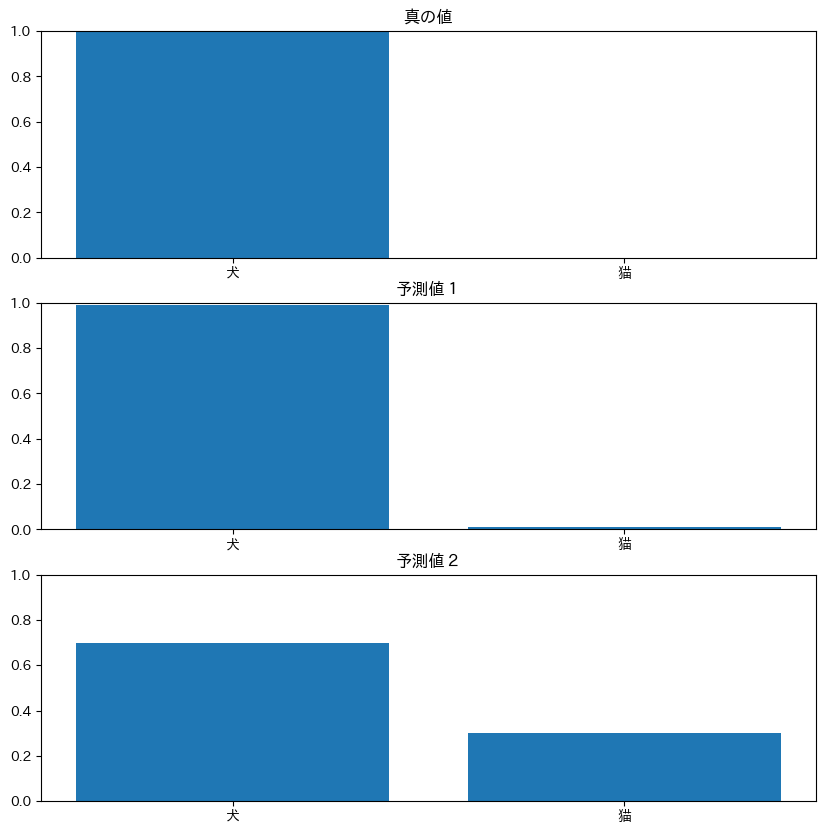

In [6]:
#@title 真の値とロジスティック回帰モデルの予測値の比較
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

fig ,ax = plt.subplots(3, 1, figsize=(10,10))

ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]
ax1.set_title("真の値")
ax1.set_ylim(0, 1)
ax2.set_title("予測値１")
ax2.set_ylim(0, 1)
ax3.set_title("予測値２")
ax3.set_ylim(0, 1)
ax1.bar(["犬", "猫"], [1, 0])
ax2.bar(["犬", "猫"], [0.99, 0.01])
ax3.bar(["犬", "猫"], [0.7, 0.3])
plt.show()


上記の例だとどちらの予測値が良さそう？

→パラメータを変化させて確率を元の分布に寄せる，ということを行う．

元の分布に似ているかどうか

→クロスエントロピー誤差

（例）２クラス分類の場合

$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{i=1}^{M} \sum_{j=1}^{2}p_{ij}log(\hat{p}_{ij}) \\
&= -\frac{1}{M}\sum_{i=1}^{M} p_{i1}log(\hat{p}_{i1})+p_{i2}log(\hat{p}_{i2}) \\
&= -\frac{1}{M}\sum_{i=1}^{M} p_{i1}log(\hat{p}_{i1})+(1-p_{i1})log(1-\hat{p}_{i1}) \,\,\, ∵p_{i1} + p_{i2} = 1
\end{align}
$$

上の式は，クラス１に対応する真の値と予測値を比較，クラス2に対応する真の値と予測値を比較し，

そしてそれらを全てのデータに対して足し合わせるということをおこなっている．

実際に予測値１の分布の方が真の値の分布に近くなっていることを確認しよう．

In [7]:
x = -710
print(np.exp(x)/(1+np.exp(x)))
print(1/(1+np.exp(-x)))

4.47628622567513e-309
0.0


<ipython-input-7-0aa2b35ad9fd>:3: RuntimeWarning: overflow encountered in exp
  print(1/(1+np.exp(-x)))


In [8]:
def np_log(x):
    """
    log関数のオーバーフローを防ぐ実装，clipで値を制限
    """
    return np.log(np.clip(x, 1e-10, 1e+10))

def sigmoid(x):
    # 単純な実装
    # return 1 / (1 + np.exp(-x))

    # expのoverflow対策を施した実装
    # x >=0 のとき sigmoid(x) = 1 / (1 + exp(-x))
    # x < 0 のとき sigmoid(x) = exp(x) / (1 + exp(x))
    return np.exp(np.minimum(x, 0)) / (1 + np.exp(- np.abs(x)))

def cross_entropy(y_hat, y):
    # WRITE ME
    pass

y = np.array([1, 0])
y_hat_1 = np.array([0.99, 0.01])
y_hat_2 = np.array([0.7, 0.3])

# y = np.array([1])
# y_hat_1 = np.array([0.99])
# y_hat_2 = np.array([0.7])

#print("予測値１のクロスエントロピー誤差：{:.3f}".format(cross_entropy(y_hat_1, y)))
#print("予測値２のクロスエントロピー誤差：{:.3f}".format(cross_entropy(y_hat_2, y)))

## コスト関数（クロスエントロピー誤差）の微分

準備：微分の公式
$$
\sigma(x) = \frac{1}{1+e^{-x}} \\
\sigma^\prime(x) = (1-\sigma(x))\sigma(x) \\
log(x)^\prime = \frac{1}{x} \\
log(f(x))^\prime = \frac{f^\prime(x)}{f(x)}
$$

コスト関数を微分する．
$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}) \\
\frac{∂J}{∂\mathbf{w}} &= \frac{∂}{∂\mathbf{w}} (-\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}))\\
&= -\frac{1}{M}\sum_{m=1}^{M} \frac{∂}{∂\mathbf{w}} (p_{m1}log(\sigma(\mathbf{x}_m\mathbf{w}+b))+(1-p_{m1})log(1-\sigma(\mathbf{x}_m\mathbf{w}+b)))
\end{align}
$$

$n$番目のパラメータについて考える．

$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}) \\
\frac{∂J}{∂w_n} &= \frac{∂}{∂w_n} (-\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}))\\
&= -\frac{1}{M}\sum_{m=1}^{M} \frac{∂}{∂w_n} (p_{m1}log(\sigma(\mathbf{x}_m\mathbf{w}+b))+(1-p_{m1})log(1-\sigma(\mathbf{x}_m\mathbf{w}+b))) \\
\frac{∂}{∂w_n} (p_{m1}log(\sigma(\mathbf{x}_m\mathbf{w}+\mathbf{b}))
&= p_{m1}\frac{∂}{∂w_n} (log(\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b))\\
&= p_{m1}\frac{\sigma^\prime(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)}{\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)} \\
&= \frac{p_{m1}x_{mn}(1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b))(\sigma(\mathbf{x}_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)))}{\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)} \\
&= p_{m1}x_{mn}(1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)) \\
&= p_{m1}x_{mn}(1-\hat{p}_{m1})\\
\frac{∂}{∂w_n} ((1-p_{m1})log(1-\sigma(\mathbf{x}_m\mathbf{w}+\mathbf{b}))
&= (1-p_{m1})\frac{∂}{∂w_n} (log(1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b))\\
&= -(1-p_{m1})\frac{\sigma^\prime(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)}{1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)} \\
&= \frac{-(1-p_{m1})x_{mn}(1-\sigma(\mathbf{x}_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b))(\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)))}{1-\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b)} \\
&= -(1-p_{m1})x_{mn}\sigma(x_{m1}w_1+\cdots+x_{mn}w_n+\cdots+x_{mN}w_N +b) \\
&= -(1-p_{m1})x_{mn}\hat{p}_{m1} \\
\end{align}
$$
よって，
$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}) \\
\frac{∂J}{∂w_n} &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}x_{mn}(1-\hat{p}_{m1}) - (1-p_{m1})x_{mn}\hat{p}_{m1}\\
&= -\frac{1}{M}\sum_{m=1}^{M} x_{mn}(p_{m1} - \hat{p}_{m1})\\
&= -\frac{1}{M}x_n^T\delta\\
\end{align}
$$

これを，$n=1 → n=N$まで考えれば良い．

すなわち，

$$
\begin{align}
J(\mathbf{w}, \mathbf{b}) &= -\frac{1}{M}\sum_{m=1}^{M} p_{m1}log(\hat{p}_{m1})+(1-p_{m1})log(1-\hat{p}_{m1}) \\
\frac{∂J}{∂\mathbf{w}} &= -\frac{1}{M}X^T\delta\\
\end{align}
$$

次に$b$について考える．
bの係数が１になっていると捉えれば良いから
$$
\frac{∂J}{∂b} = -\frac{1}{M}\mathbf{1}^T\delta = -\bar{\delta}
$$

これを元に勾配降下法のアルゴリズムを書く．

In [9]:
# まずはLogisticRegression()というクラスを定義しよう。
# WRITE ME

In [10]:
# 初期化メソッド(__init__())を定義しよう。
# 引数は入力の次元
# self.w, self.bという属性名で重みを初期化する
# wはランダムな一様分布からサンプリング（np.random.uniform(low=-0.08, high=0.08, size=(n_dims, 1)).astype("float64")）
# bはなんでも良いので，０を初期値とする。

class LogisticRegression():
    def __init__(self, n_dims):
        """
        n_dims: 入力の次元
        """
        # WRITE ME
        pass

$$
シグモイド関数 \\
\sigma(x) = \frac{1}{1+e^{-x}} \\
\sigma(\hat{\mathbf{y}}) = \sigma(X\mathbf{w}+\mathbf{b}) = \hat{p}(\mathbf{w}, \mathbf{b})
$$

In [11]:
# 次に，予測値を得るためのpredict()メソッドを実装しよう
# 予測値はxとする
# ヒント；重み付き線形和をシグモイド関数に入力する。

class LogisticRegression():
    def __init__(self, n_dims):

        self.w = np.random.uniform(low=-0.08, high=0.08,
                                   size=(n_dims, 1)).astype("float64")
        self.b = 0

    def predict(self, X):
        #WRITE ME
        pass

$$
J(\mathbf{w}, \mathbf{b}) = -\frac{1}{M}\sum_{i=1}^{M} p_{i1}log(\hat{p}_{i1})+(1-p_{i1})log(1-\hat{p}_{i1}) \,\,\, ∵p_{i1} + p_{i2} = 1
$$

In [12]:
# さらに，costメソッドを定義しよう．今回はクロスエントロピー誤差を用いるのでそれを実装する．

class LogisticRegression():
    def __init__(self, n_dims):

        self.w = np.random.uniform(low=-0.08, high=0.08,
                                   size=(n_dims, 1)).astype("float64")
        self.b = 0

    def cost(self, X, y):
        """
        X: 特徴量
        y: 正解データ
        """
        #WRITE ME
        pass

    def predict(self, X):
        return np.exp(np.minimum(X @ self.w + self.b, 0)) / (1 + np.exp(- np.abs(X @ self.w + self.b)))

$$
\frac{∂J}{∂\mathbf{w}} = -\frac{1}{M}X^T\delta \\
\frac{∂J}{∂b} = -\frac{1}{M}\mathbf{1}^T\delta = -\bar{\delta}
$$


In [13]:
# 最後に，勾配を元にパラメータを更新するupdateメソッドを定義しよう．
class LogisticRegression():
    def __init__(self, n_dims):

        self.w = np.random.uniform(low=-0.08, high=0.08,
                                   size=(n_dims, 1)).astype("float64")
        self.b = 0

    def cost(self, X, y):
        y_hat = self.predict(X)
        return (- y * np_log(y_hat) - (1 - y) * np_log(1 - y_hat)).mean()

    def update(self, X, y, alpha):

        # 予測値を計算
        y_hat = # WRITE ME
        y = y.reshape(-1, 1)

        #　誤差を計算
        delta = # WRITE ME

        # 勾配を計算
        dw = # WRITE ME
        db = # WRITE ME

        # 勾配を元に更新
        self.w -= # WRITE ME
        self.b -= # WRITE ME

        J = self.cost(X, y)
        return J

    def predict(self, X):
        return np.exp(np.minimum(X @ self.w + self.b, 0)) / (1 + np.exp(- np.abs(X @ self.w + self.b)))

SyntaxError: ignored

In [ ]:
#バッチ学習
x_train_or = np.array([[0, 1], [1, 0], [0, 0], [1, 1]]) # ( 4, 2 )
y_train_or = np.array([[1], [1], [0], [1]])
x_valid_or, y_valid_or = x_train_or, y_train_or

# batch sizeを定義（バッチ学習なので，全データを１度の更新に使う）
batch_size = x_train_or.shape[0]

# 学習率を定義
alpha = 1.

iter = int(x_train_or.shape[0]/batch_size)
epochs = 100
np.random.seed(1)
logreg = LogisticRegression(n_dims=x_train_or.shape[1])

# 描画のための配列を用意
_ = [i+1 for i in range(iter*epochs)]
cost_J = []

for epoch in range(epochs):
    # np.random.permutation: 配列の要素をランダムに並べ替える関数
    # [1, 2, 3, 4, 5, 6] -> [5, 3, | 1, 4, | 6, 2]
    idxs = np.random.permutation(x_train_or.shape[0])
    idxs = np.array_split(idxs, iter)
    for idx in idxs:
        _X = x_train_or[idx][:]
        _y = y_train_or[idx][:]
        c = logreg.update(_X, _y, alpha=alpha)
        cost_J.append(c)
    print("EPOCH: {}, cost: {}".format(epoch, c))

In [ ]:
print(logreg.predict(x_valid_or))

In [ ]:
from sklearn.datasets import load_breast_cancer # 乳がんのデータセット
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df

In [ ]:
plt.hist(cancer.target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# モデルのインスタンスを生成
logreg = LogisticRegression(n_dims=X_train.shape[1])

# バッチサイズを指定
batch_size = 6 #X_train.shape[0]

# 学習率を指定
# alpha = 0.0001
# alpha = 0.00001

# epoch数を指定
epochs = 1000

# 乱数シードを固定
np.random.seed(1)

# 描画のための配列を用意
iter = int(X_train.shape[0]/batch_size)
_ = [i+1 for i in range(epochs)]
cost_J = []

for epoch in range(epochs):
    # np.random.permutation: 配列の要素をランダムに並べ替える関数
    # [1, 2, 3, 4, 5, 6] -> [5, 3, | 1, 4, | 6, 2]
    idxs = np.random.permutation(X_train.shape[0])
    idxs = np.array_split(idxs, iter)
    for idx in idxs:
        _X = X_train[idx][:]
        _y = y_train[idx][:]
        c = logreg.update(_X, _y, alpha=alpha)
    cost_J.append(np_log(c))
    if epoch % 100 == 0:
        print("EPOCH: {}, cost: {}".format(epoch, c))
    if epoch == 800 :
         alpha /= 1000

In [ ]:
plt.figure(figsize=(100, 30))
plt.plot(_, cost_J)
plt.show()

In [ ]:
y_pred = logreg.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(accuracy_score(y_test, y_pred))

In [ ]:
#ロジスティック回帰クラスからインスタンス生成
sk_logreg = # WRITE ME
# fitメソッドで学習
# WRITE ME

In [ ]:
print(f"訓練データ精度　=　{sk_logreg.score(X_train, y_train)}")
print(f"テストデータ精度　=　{sk_logreg.score(X_test, y_test)}")